# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as scipy
import math


df = pd.read_csv('data/human_body_temperature.csv')

### Q1: Is the distribution of body temperatures normal?

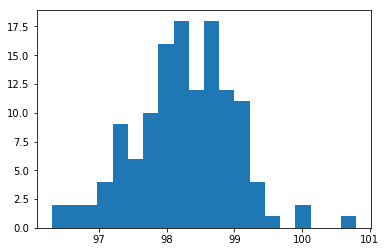

In [12]:
plt.hist(df['temperature'], bins = 20)
plt.show()

In [17]:
print('normality =', scipy.stats.normaltest(df['temperature']))

normality = NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


Normality test indicates data are not significantly different from normal (P > 0.05) 

### Q2: Is the sample size large? Are the observations independent? 

In [18]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

There are 130 observations, which is large enough for statistical tests, though small compared to the human population.  The observations are independent because they are taken from different individuals.

### Q3: Is the true population mean really 98.6 degrees F?

The sample size is greater than 30, can use z statistic

In [34]:
mean = df['temperature'].mean()
sd = df['temperature'].std()

std_err = sd/ math.sqrt(len(df))
zscore = (mean - 98.6)/std_err
pvalue = scipy.stats.norm.cdf(zscore)
print (pvalue)

# Since the p- value is less than 0.05, so the true population mean is  
#significnalty different from 98.6


2.45107850706e-08


In [29]:
scipy.stats.ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

### Q4: At what temperature should we consider someone's temperature to be "abnormal"?

In [27]:
upper_limit_CI = 98.2 + 1.96 * std_err
lower_limit_CI = 98.2 - 1.96 * std_err
print (" Body temeperature is abnormal if it is less than " + str (lower_limit_CI)
      + " or is greater than " + str(upper_limit_CI))

 Body temeperature is abnormal if it is less than 98.07396334299774 or is greater than 98.32603665700226


### Q5: Is there a significant differenece between males and females in mean temperature?

In [19]:
male = df[df.gender=="M"]
female = df[df.gender=="F"]

scipy.stats.ttest_ind(male.temperature, female.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)